## New EDA

- Setting
- Redefinition
- EDA
- Preprocessing

---

### 0. Setting

In [1]:
import pandas as pd
import datetime
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
taxi = pd.read_csv("train.csv")

In [4]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


 변수분석 (11개)

- id : 고유번호
- vendor_id : 주행기록과 관련된 업체를 나타냄 (1,2로만 구성)
- pickup_datetime : 탑승시간 (년, 월, 일, 시간, 분, 초로 구성)
- dropoff_datetime : 하차시간 (년, 월, 일, 시간, 분, 초로 구성)
- passenger_count : 한 택시안의 승객수(명)
- pickup_longitude : 탑승 경도 (좌표)
- pickup_latitude : 탑승 위도 (좌표)
- dropoff_longitude : 하차 경도 (좌표)
- dropoff_latitude : 하차 위도 (좌표)
- store_and_fwd_flag : 주행기록이 차량 메모리에 보관되어 있는지 여부 (yes, no)
- trip_duration : 주행시간 (초)

---

### 1. Redefinition

1) 선정 할 변수

- vendor_id
- passenger_count
- sotre_and_fwd_flag
- distance (logitude,latitude이용)
- speed = 거리/시간
- hour (00~23)
- month (Jan ~ Dec)
- weekday (mon ~ sun)
- weather (외부데이터)
- trip_duration

2) 선정한 변수로 프레임 재정의

- store_and-fwd_flag (Y:1, N:0)

In [5]:
taxi['store_and_fwd_flag'] = np.where(taxi['store_and_fwd_flag']=='N', 0, 1)

In [6]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198


- distance 생성

In [7]:
from ipyleaflet import *
import time

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=15)

In [9]:
marker = Marker(location=center)
m += marker

In [10]:
taxi['pickup'] = list(zip(taxi['pickup_latitude'], taxi['pickup_longitude']))
pickup_sample = list(taxi['pickup'][0:20]) # sample data 생성

In [11]:
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)

In [12]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [13]:
taxi['dist'] = \
    haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'],
                 taxi['dropoff_longitude'], taxi['dropoff_latitude'])

- speed 생성

In [14]:
taxi['speed'] = taxi['dist'] / (taxi['trip_duration']/3600) # 초를 시간으로 바꿔서 속도 구하기 (km/h)

In [15]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,"(40.745521545410156, -73.9822006225586)",1.224311,5.665192
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,"(40.74737930297852, -74.00094604492188)",6.046037,33.230128
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,"(40.768798828125, -73.9591293334961)",7.819693,36.846722
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,"(40.749061584472656, -73.9820785522461)",1.091878,10.538232
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,"(40.7817497253418, -73.9795379638672)",1.133330,20.605999


- time (pick_up)

In [16]:
taxi["pickup_datetime"] = pd.to_datetime(taxi["pickup_datetime"]) # pickup_datetime데이터를 datetime타입으로 변환
taxi["hour"] = taxi["pickup_datetime"].dt.hour

In [17]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed,hour
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,"(40.745521545410156, -73.9822006225586)",1.224311,5.665192,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,"(40.74737930297852, -74.00094604492188)",6.046037,33.230128,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,"(40.768798828125, -73.9591293334961)",7.819693,36.846722,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,"(40.749061584472656, -73.9820785522461)",1.091878,10.538232,15
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,"(40.7817497253418, -73.9795379638672)",1.133330,20.605999,14


- month

In [18]:
taxi["month"] = taxi["pickup_datetime"].dt.month

In [19]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed,hour,month
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,"(40.745521545410156, -73.9822006225586)",1.224311,5.665192,13,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,"(40.74737930297852, -74.00094604492188)",6.046037,33.230128,7,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,"(40.768798828125, -73.9591293334961)",7.819693,36.846722,6,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,"(40.749061584472656, -73.9820785522461)",1.091878,10.538232,15,1
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,"(40.7817497253418, -73.9795379638672)",1.133330,20.605999,14,4


- weekday

In [20]:
taxi["weekday"] = taxi["pickup_datetime"].dt.weekday

In [21]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed,hour,month,weekday
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,"(40.745521545410156, -73.9822006225586)",1.224311,5.665192,13,4,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,"(40.74737930297852, -74.00094604492188)",6.046037,33.230128,7,1,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,"(40.768798828125, -73.9591293334961)",7.819693,36.846722,6,4,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,"(40.749061584472656, -73.9820785522461)",1.091878,10.538232,15,1,1
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,0,198,"(40.7817497253418, -73.9795379638672)",1.133330,20.605999,14,4,1


- weather

In [22]:
weather = pd.read_csv("weather.csv")

In [23]:
weather.tail()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
361,27-12-2016,60,40,50.0,0,0,0
362,28-12-2016,40,34,37.0,0,0,0
363,29-12-2016,46,33,39.5,0.39,0,0
364,30-12-2016,40,33,36.5,0.01,T,0
365,31-12-2016,44,31,37.5,0,0,0


In [24]:
weather["date"] = pd.to_datetime(weather["date"])

#### 새로운 데이터 프레임 생성 (일단 날씨는 제외)

In [25]:
taxi_1 = pd.DataFrame(taxi, columns=["vendor_id", "passenger_count", "store_and_fwd_flag", "dist", "speed", "hour", "month", "weekday", "trip_duration"])

In [27]:
taxi_1["count"] = 1

In [28]:
taxi_1.tail(10)

,vendor_id,passenger_count,store_and_fwd_flag,dist,speed,hour,month,weekday,trip_duration,count
1458634,1,2,0,5.255687,19.465508,13,4,6,972,1
1458635,2,1,0,0.616594,9.365992,14,5,3,237,1
1458636,2,1,0,0.930065,4.185293,10,2,4,800,1
1458637,1,1,0,3.535334,16.746319,18,4,6,760,1
1458638,2,5,0,2.315993,20.139073,0,2,1,414,1
1458639,2,4,0,1.224311,5.665192,13,4,4,778,1
1458640,1,1,0,6.046037,33.230128,7,1,6,655,1
1458641,2,1,0,7.819693,36.846722,6,4,4,764,1
1458642,1,1,0,1.091878,10.538232,15,1,1,373,1
1458643,1,1,0,1.133330,20.605999,14,4,1,198,1


In [28]:
taxi_1.tail(5)

,vendor_id,passenger_count,store_and_fwd_flag,dist,speed,hour,month,weekday,trip_duration,count
1458639,2,4,0,1.224311,5.665192,13,4,4,778,1
1458640,1,1,0,6.046037,33.230128,7,1,6,655,1
1458641,2,1,0,7.819693,36.846722,6,4,4,764,1
1458642,1,1,0,1.091878,10.538232,15,1,1,373,1
1458643,1,1,0,1.133330,20.605999,14,4,1,198,1


---

### 2. EDA

1) 각 변수별 EDA

- vendor_id

In [45]:
taxi_vendor = pd.DataFrame(taxi_1, columns=["vendor_id"])
taxi_vendor = taxi_1.groupby(["vendor_id"]).size().reset_index(name='Counts')
taxi_vendor

,vendor_id,Counts
0,1,678342
1,2,780302


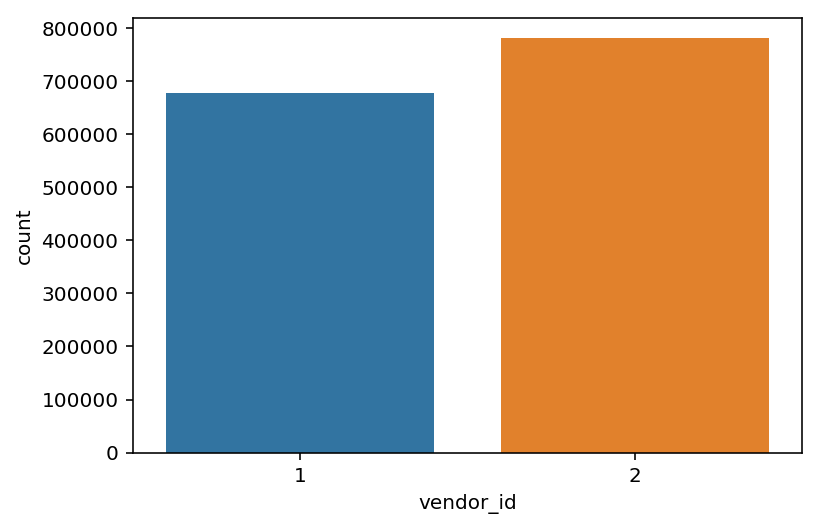

In [46]:
sns.countplot(x = 'vendor_id', data = taxi_1)
plt.show()

- passenger_count

In [47]:
taxi_passenger = pd.DataFrame(taxi_1, columns=["passenger_count"])
taxi_passenger = taxi_1.groupby(["passenger_count"]).size().reset_index(name='Counts')
taxi_passenger 

,passenger_count,Counts
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


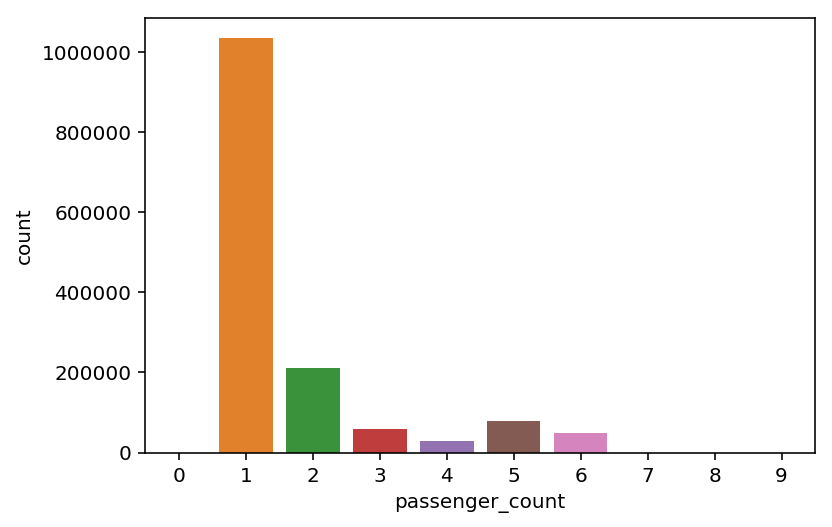

In [48]:
sns.countplot(x = 'passenger_count', data = taxi_1)
plt.show()

- sotre_and_fwd_flag

In [49]:
taxi_store = pd.DataFrame(taxi_1, columns=["store_and_fwd_flag"])
taxi_store = taxi_1.groupby(["store_and_fwd_flag"]).size().reset_index(name='Counts')
taxi_store

,store_and_fwd_flag,Counts
0,0,1450599
1,1,8045


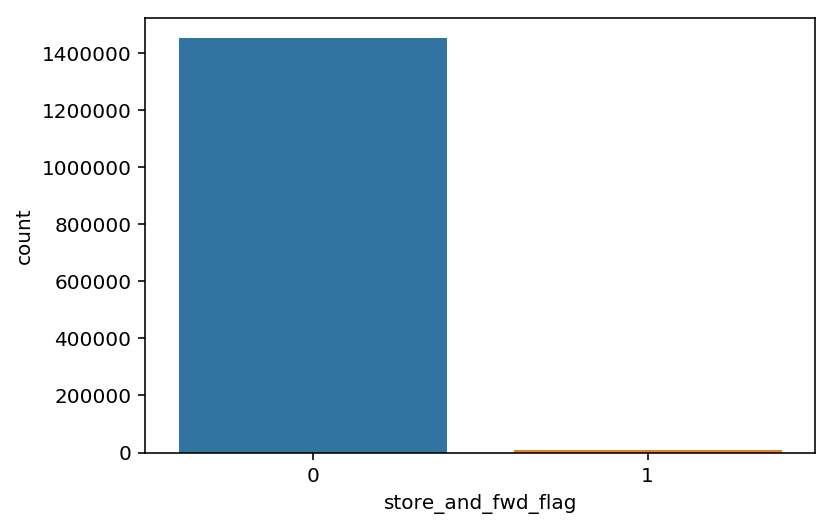

In [50]:
sns.countplot(x = 'store_and_fwd_flag', data = taxi_1)
plt.show()

- dist (logitude,latitude이용)

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1["dist"].describe()

count   1458644.00
mean          3.44
std           4.29
min           0.00
25%           1.23
50%           2.09
75%           3.87
max        1240.13
Name: dist, dtype: float64

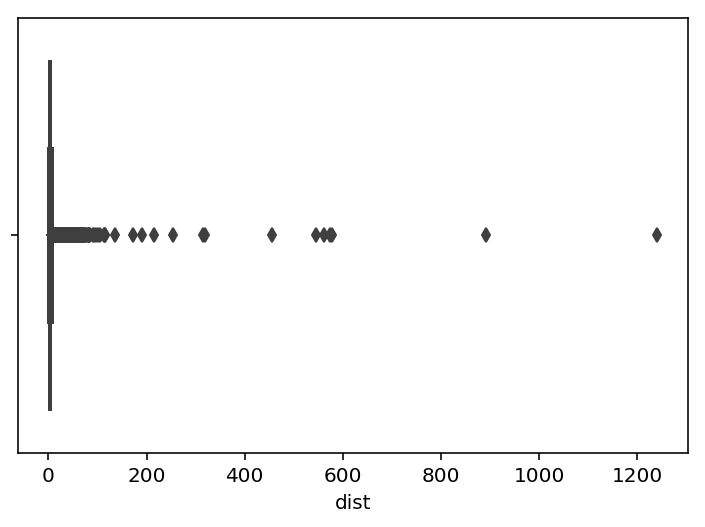

In [52]:
sns.boxplot(x = 'dist', data = taxi_1)
plt.show()

- speed = 거리/시간

In [53]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1["speed"].describe()

count   1458644.00
mean         14.41
std          14.97
min           0.00
25%           9.12
50%          12.78
75%          17.83
max        9269.01
Name: speed, dtype: float64

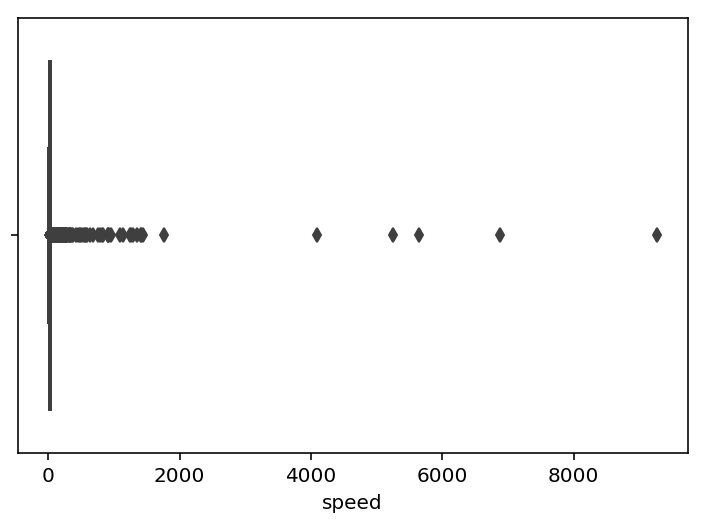

In [54]:
sns.boxplot(x = 'speed', data = taxi_1)
plt.show()

- hour (00~23)

In [55]:
taxi_hour = pd.DataFrame(taxi_1, columns=["hour"])
taxi_hour = taxi_1.groupby(["hour"]).size().reset_index(name='counts')
taxi_hour

,hour,counts
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


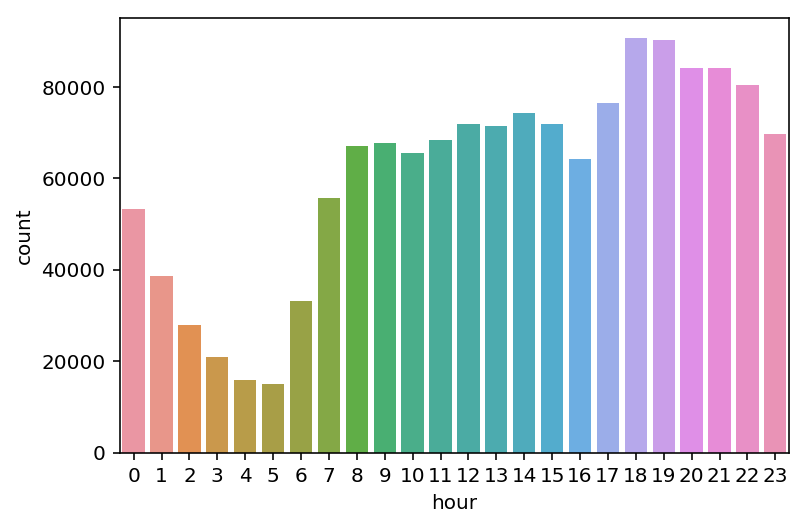

In [56]:
sns.countplot(x = 'hour', data = taxi_1)
plt.show()

- month (Jan ~ Dec)

In [57]:
taxi_month = pd.DataFrame(taxi_1, columns=["month"])
taxi_month = taxi_1.groupby(["month"]).size().reset_index(name='Counts')
taxi_month

,month,Counts
0,1,229707
1,2,238300
2,3,256189
3,4,251645
4,5,248487
5,6,234316


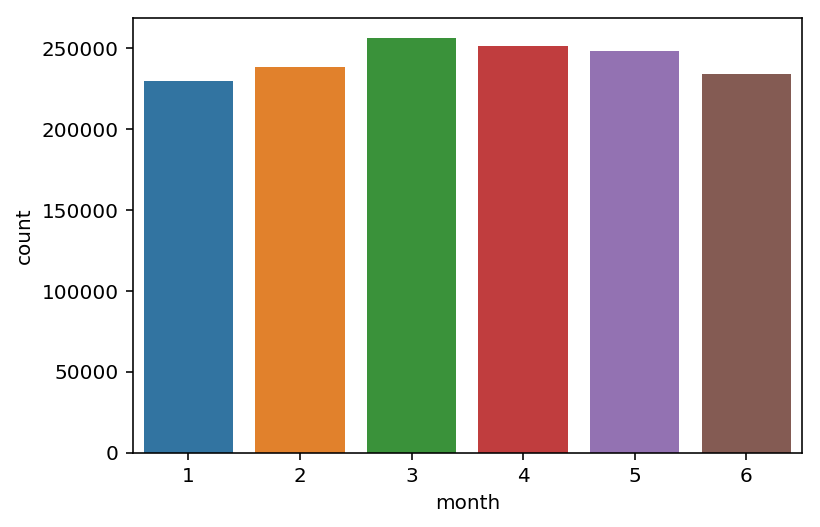

In [58]:
sns.countplot(x = 'month', data = taxi_1)
plt.show()

- weekday (mon ~ sun)

In [59]:
taxi_weekday = pd.DataFrame(taxi_1, columns=["weekday"])
taxi_weekday = taxi_1.groupby(["weekday"]).size().reset_index(name='Counts')
taxi_weekday

,weekday,Counts
0,0,187418
1,1,202749
2,2,210136
3,3,218574
4,4,223533
5,5,220868
6,6,195366


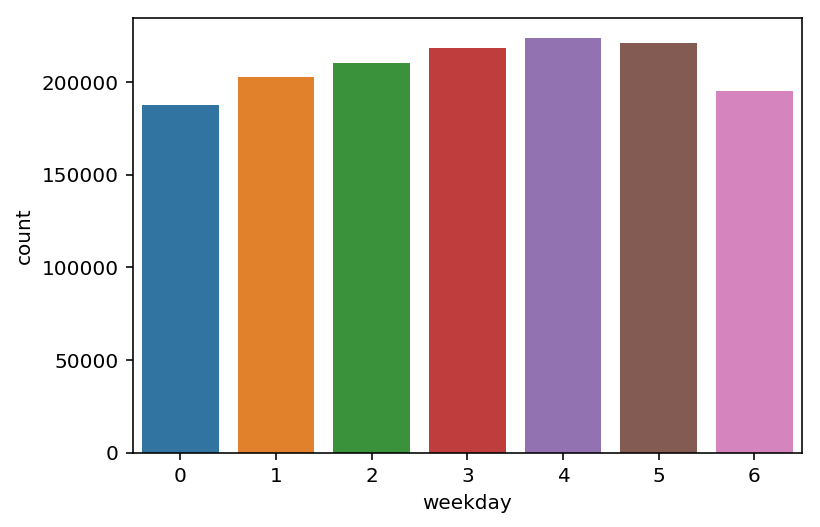

In [60]:
sns.countplot(x = 'weekday', data = taxi_1)
plt.show()

- trip_duration

In [61]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1["trip_duration"].describe()

count   1458644.00
mean        959.49
std        5237.43
min           1.00
25%         397.00
50%         662.00
75%        1075.00
max     3526282.00
Name: trip_duration, dtype: float64

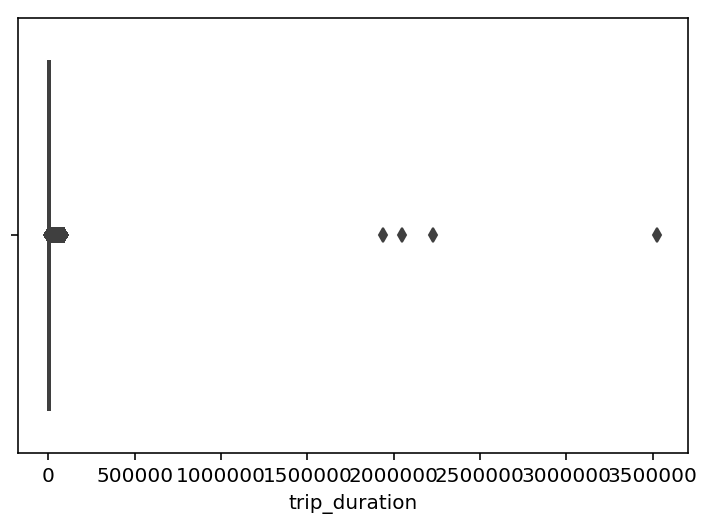

In [62]:
sns.boxplot(x = 'trip_duration', data = taxi_1)
plt.show()

---

### 3. Preprocessing (전처리)

1) passenger_count (승객수)

전처리 내용

- 0명 제거 : 손님이 없는 택시는 의미가 없음
- 7명 이상 제거 : 최대 탑승 고객이 6명이라 판단

In [63]:
len(taxi_1['passenger_count'][taxi_1['passenger_count'] == 0])

60

In [64]:
len(taxi_1['passenger_count'][taxi_1['passenger_count'] >= 7])

5

In [65]:
taxi_1 = taxi_1[taxi_1['passenger_count'] > 0].reset_index(drop=True)
taxi_1 = taxi_1[taxi_1['passenger_count'] < 7].reset_index(drop=True)

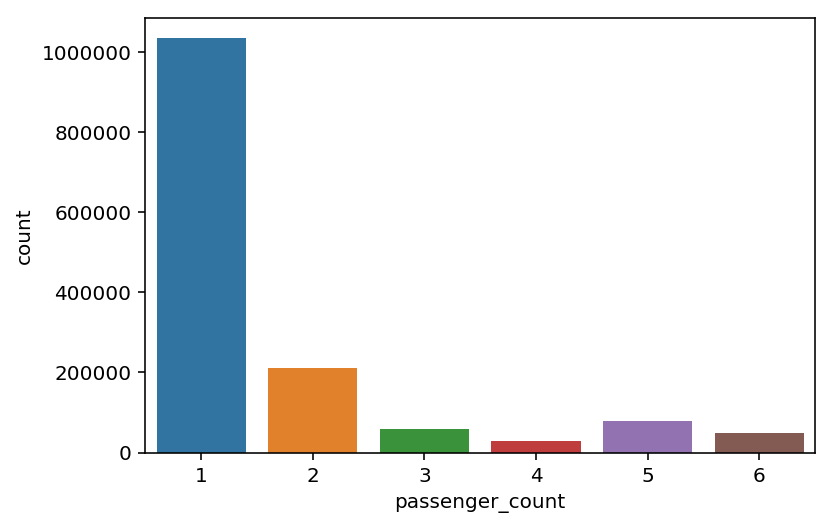

In [66]:
sns.countplot(x = 'passenger_count', data = taxi_1)
plt.show()

2) dist (거리)

전처리 내용

- 700m 이하 제거 : 일반적으로 700m 이하는 도보이동거리이기 때문, 오작동이 많을 것으로 이상
- 50km 이상 제거 : 지도의 분포를 봤을 때 대부분 맨하튼 시내에서의 거리가 대부분이고 좌표에서 최대 거리를 구글 맵으로 측정했을때 약 40km가 넘었는데 오차를 고려하여 50km로 설정

In [67]:
len(taxi_1['dist'][taxi_1['dist'] < 0.7])

107925

In [68]:
len(taxi_1['dist'][taxi_1['dist'] > 50])

87

In [69]:
taxi_1 = taxi_1[taxi_1['dist'] > 0.7].reset_index(drop=True)
taxi_1 = taxi_1[taxi_1['dist'] < 50].reset_index(drop=True)

In [70]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1["dist"].describe()

count   1350567.00
mean          3.67
std           3.98
min           0.70
25%           1.40
50%           2.26
75%           4.12
max          49.98
Name: dist, dtype: float64

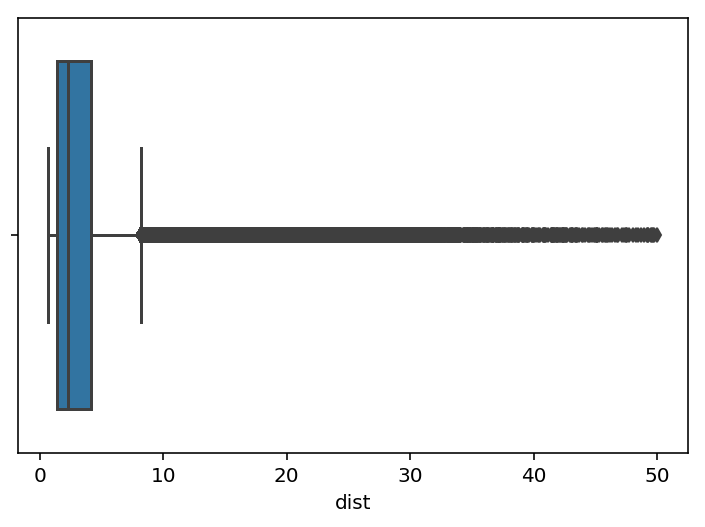

In [71]:
sns.boxplot(x = 'dist', data = taxi_1)
plt.show()

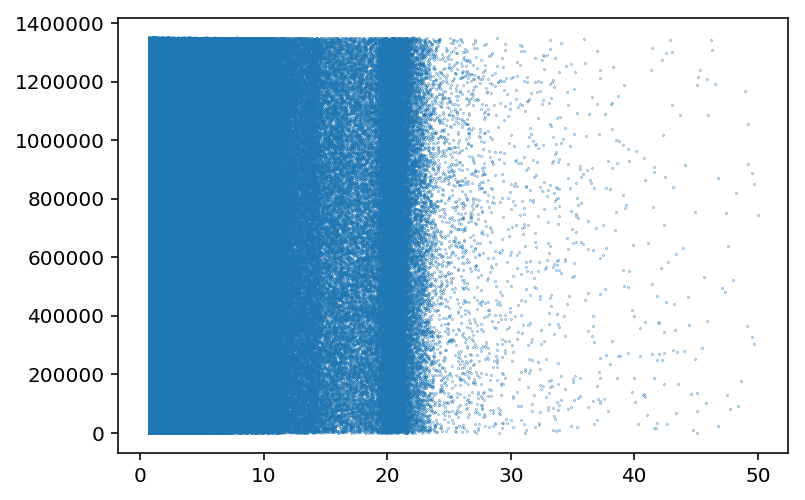

In [72]:
plt.scatter(taxi_1['dist'], taxi_1.index, s=0.05)
plt.show()

3) speed (속도)

전처리 내용

- 15km/h 이하 제거 : 자전거 평균 속도가 15km/h이기 때문에 그보다 늦는 경우는 오작동이라 예상
- 120km/h 이상 제거 : 임의로 정함 (근거가 있어야..)

In [73]:
len(taxi_1['speed'][taxi_1['speed'] < 15])

822891

In [74]:
len(taxi_1['speed'][taxi_1['speed'] > 120])

51

In [75]:
taxi_1 = taxi_1[taxi_1['speed'] > 15].reset_index(drop=True)
taxi_1 = taxi_1[taxi_1['speed'] < 120].reset_index(drop=True)

In [76]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1["speed"].describe()

count   527625.00
mean        22.11
std          6.97
min         15.00
25%         17.07
50%         19.94
75%         24.87
max        117.55
Name: speed, dtype: float64

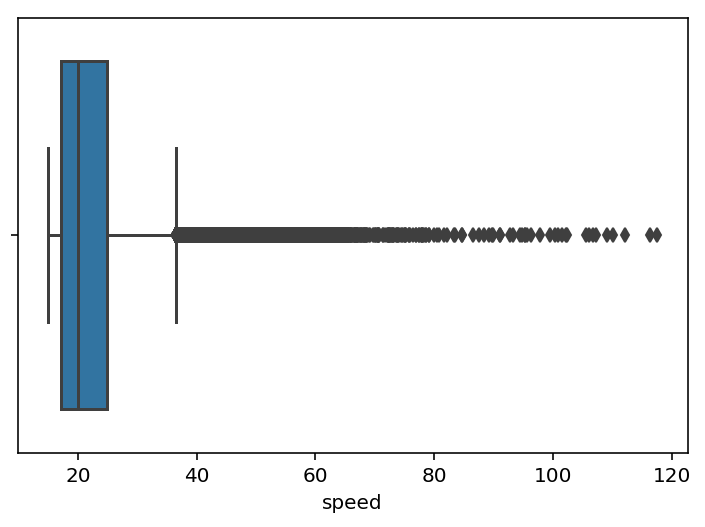

In [77]:
sns.boxplot(x = 'speed', data = taxi_1)
plt.show()

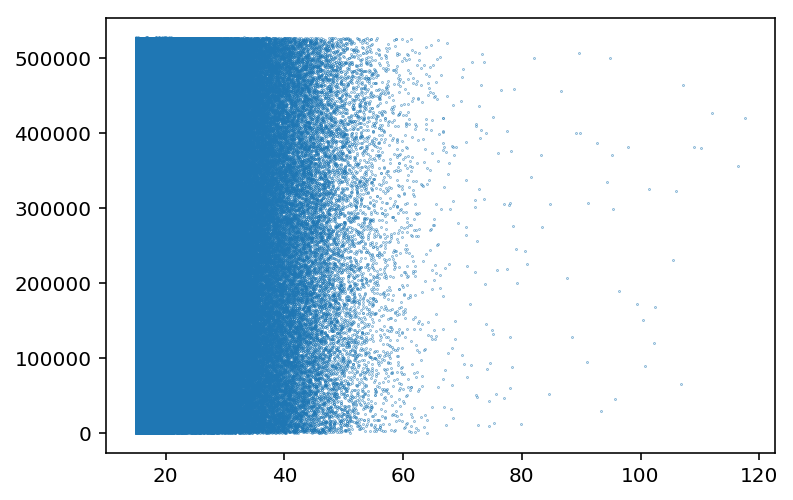

In [78]:
plt.scatter(taxi_1['speed'], taxi_1.index, s=0.05)
plt.show()

4) trip_duration

전처리 내용

- 60초(1분) 이하 제거 : 택시를 1분타려고 탑승한 승객이 있을까..?
- 18,000초(5시간) 이상 제거 : 택시라는게 신속함을 위해서 타는 운송 수단인데 2시간 이상 걸려서 가는것도 의심이 되지만.. 일단은 큰 이상치를 제거하는것으로 5시간 이상으로 정의

In [79]:
len(taxi_1['trip_duration'][taxi_1['trip_duration'] < 60])

72

In [80]:
len(taxi_1['trip_duration'][taxi_1['trip_duration'] > 18000])

0

In [81]:
taxi_1 = taxi_1[taxi_1['trip_duration'] > 60].reset_index(drop=True)
taxi_1 = taxi_1[taxi_1['trip_duration'] < 18000].reset_index(drop=True)

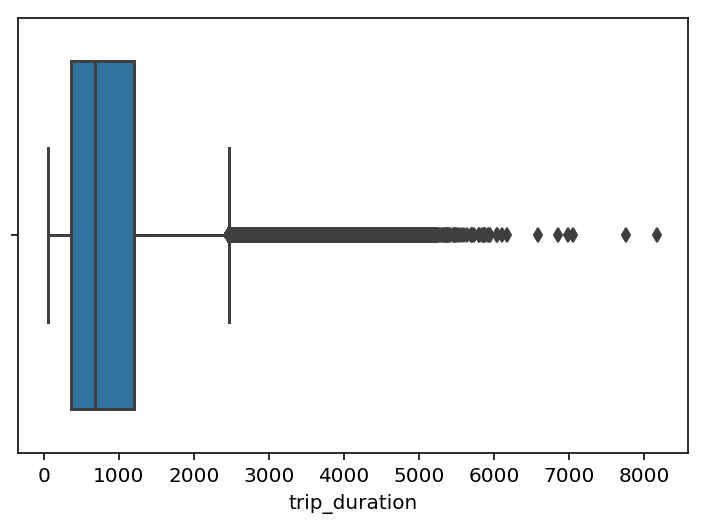

In [82]:
sns.boxplot(x = 'trip_duration', data = taxi_1)
plt.show()

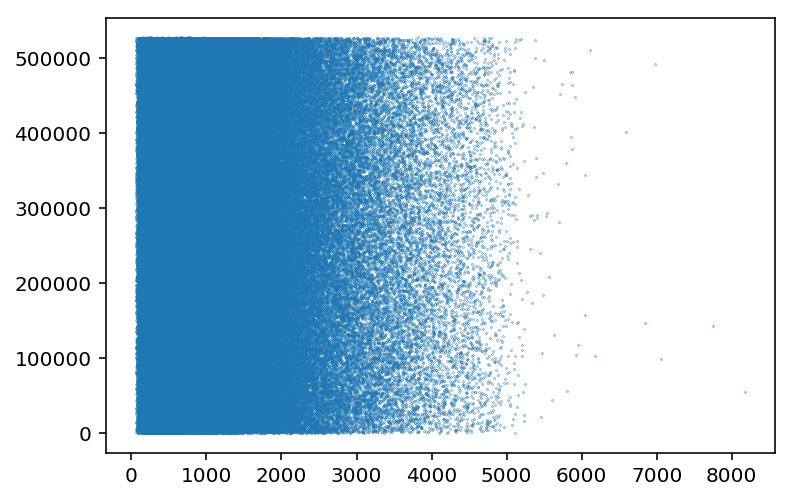

In [83]:
plt.scatter(taxi_1['trip_duration'], taxi_1.index, s=0.05)
plt.show()

---

### 4. EDA (with trip_duration)

In [84]:
# 전처리 후 데이터
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi_1.describe()

,vendor_id,passenger_count,store_and_fwd_flag,dist,speed,hour,month,weekday,trip_duration,count
count,527543.00,527543.00,527543.00,527543.00,527543.00,527543.00,527543.00,527543.00,527543.00,527543.00
mean,1.54,1.66,0.01,5.71,22.10,12.86,3.47,3.22,906.58,1.00
std,0.50,1.31,0.08,5.33,6.95,7.43,1.68,2.07,749.64,0.00
min,1.00,1.00,0.00,0.70,15.00,0.00,1.00,0.00,61.00,1.00
25%,1.00,1.00,0.00,2.00,17.07,7.00,2.00,1.00,368.00,1.00
50%,2.00,1.00,0.00,3.78,19.94,14.00,3.00,3.00,682.00,1.00
75%,2.00,2.00,0.00,7.44,24.87,20.00,5.00,5.00,1206.00,1.00
max,2.00,6.00,1.00,49.98,117.55,23.00,6.00,6.00,8173.00,1.00


**1) vendor별 trip_duration**

(1) DataFrame

In [85]:
# vendor_id별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="trip_duration",columns=["vendor_id"], aggfunc=np.mean)
df

vendor_id,1,2
trip_duration,895.88,915.81


(2) Boxplot

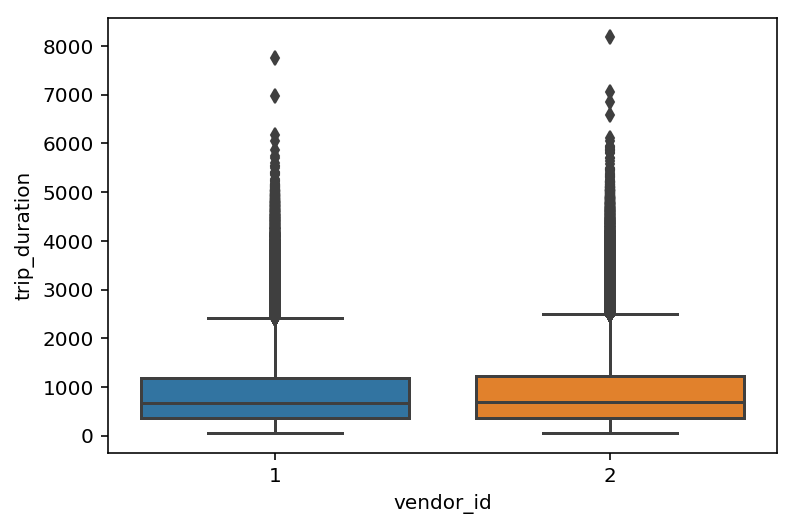

In [86]:
# vendor_id별 boxplot
sns.boxplot(x="vendor_id", y="trip_duration", data=taxi_1)
plt.show()

(3) Jointplot

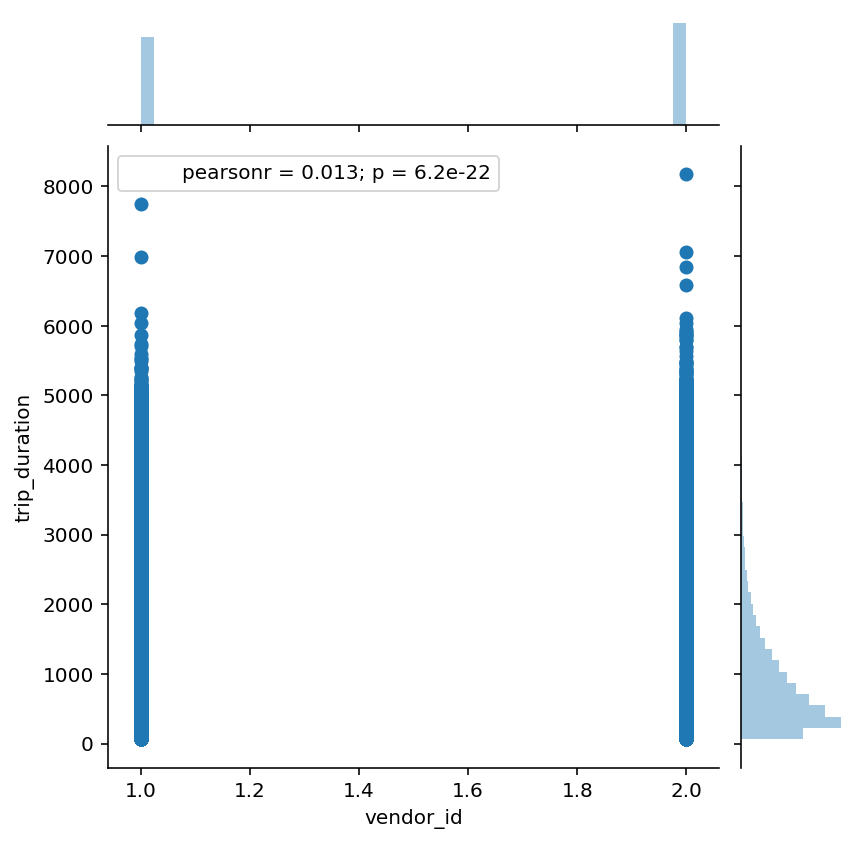

In [87]:
sns.jointplot(x="vendor_id", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

**2) passenger_count별 trip_duration**

(1) DataFrame

In [88]:
# passenger_count별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="passenger_count",columns=["weekday"], aggfunc=np.mean)
df

weekday,0,1,2,3,4,5,6
passenger_count,1.63,1.63,1.63,1.63,1.66,1.71,1.70


(2) Boxplot

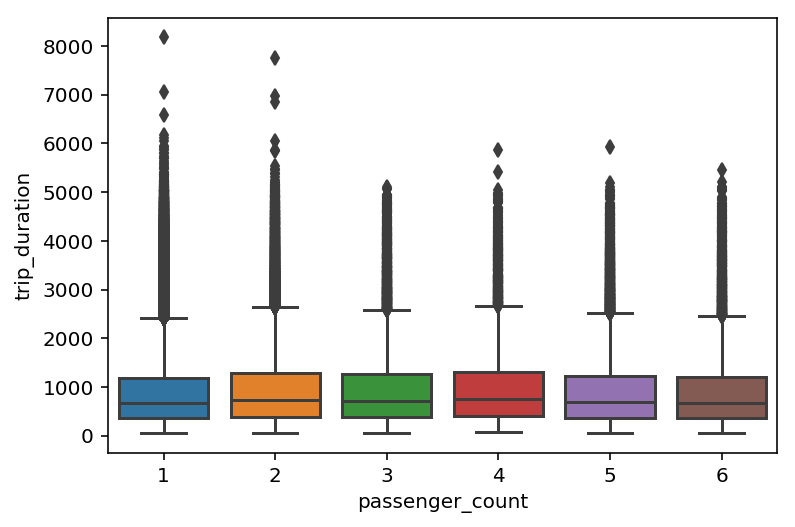

In [89]:
# passenger_count별 boxplot
sns.boxplot(x="passenger_count", y="trip_duration", data=taxi_1)
plt.show()

(3) Jointplot

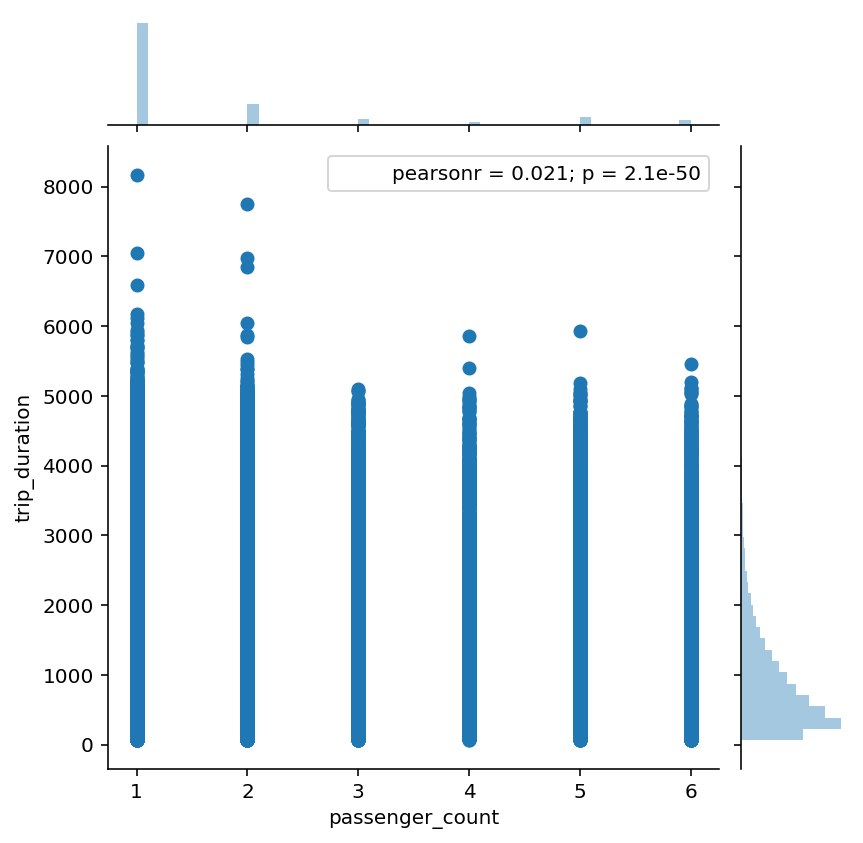

In [90]:
sns.jointplot(x="passenger_count", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

**3) store_and_fwd_flag별 trip_duration**

(1) DataFrame

In [91]:
# store_and_fwd_flag별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="trip_duration",columns=["store_and_fwd_flag"], aggfunc=np.mean)
df

store_and_fwd_flag,0,1
trip_duration,904.07,1305.26


(2) Boxplot

In [92]:
# store_and_fwd_flag별 boxplot
sns.subplot(x="store_and_fwd_flag", y="trip_duration", data=taxi_1)
plt.show()

AttributeError: module 'seaborn' has no attribute 'subplot'

(3) Jointplot

In [ ]:
sns.jointplot(x="store_and_fwd_flag", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

**4) hour별 trip_duration**

(1) DataFrame

In [ ]:
# hour별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="trip_duration",columns=["hour"], aggfunc=np.mean)
df

(2) Boxplot

In [ ]:
# hour별 boxplot
sns.boxplot(x="hour", y="trip_duration", data=taxi_1)
plt.show()

(3) Jointplot

In [ ]:
sns.jointplot(x="hour", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

**5) month별 trip_duration**

(1) DataFrame

In [ ]:
# month별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="trip_duration",columns=["month"], aggfunc=np.mean)
df

(2) Boxplot

In [ ]:
# month별 boxplot
sns.boxplot(x="month", y="trip_duration", data=taxi_1)
plt.show()

(3) Jointplot

In [ ]:
sns.jointplot(x="month", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

**6) weekday별 trip_duration**

(1) DataFrame

In [ ]:
# weekday별 trip_duration 평균 df생성
df = taxi_1.pivot_table(values="trip_duration",columns=["weekday"], aggfunc=np.mean)
df

(2) Boxplot

In [ ]:
# weekday별 boxplot
sns.boxplot(x="weekday", y="trip_duration", data=taxi_1)
plt.show()

(3) Jointplot

In [ ]:
sns.jointplot(x="weekday", y="trip_duration", data=taxi_1, kind='scatter')
plt.show()

### 5. 다른 변수끼리 EDA

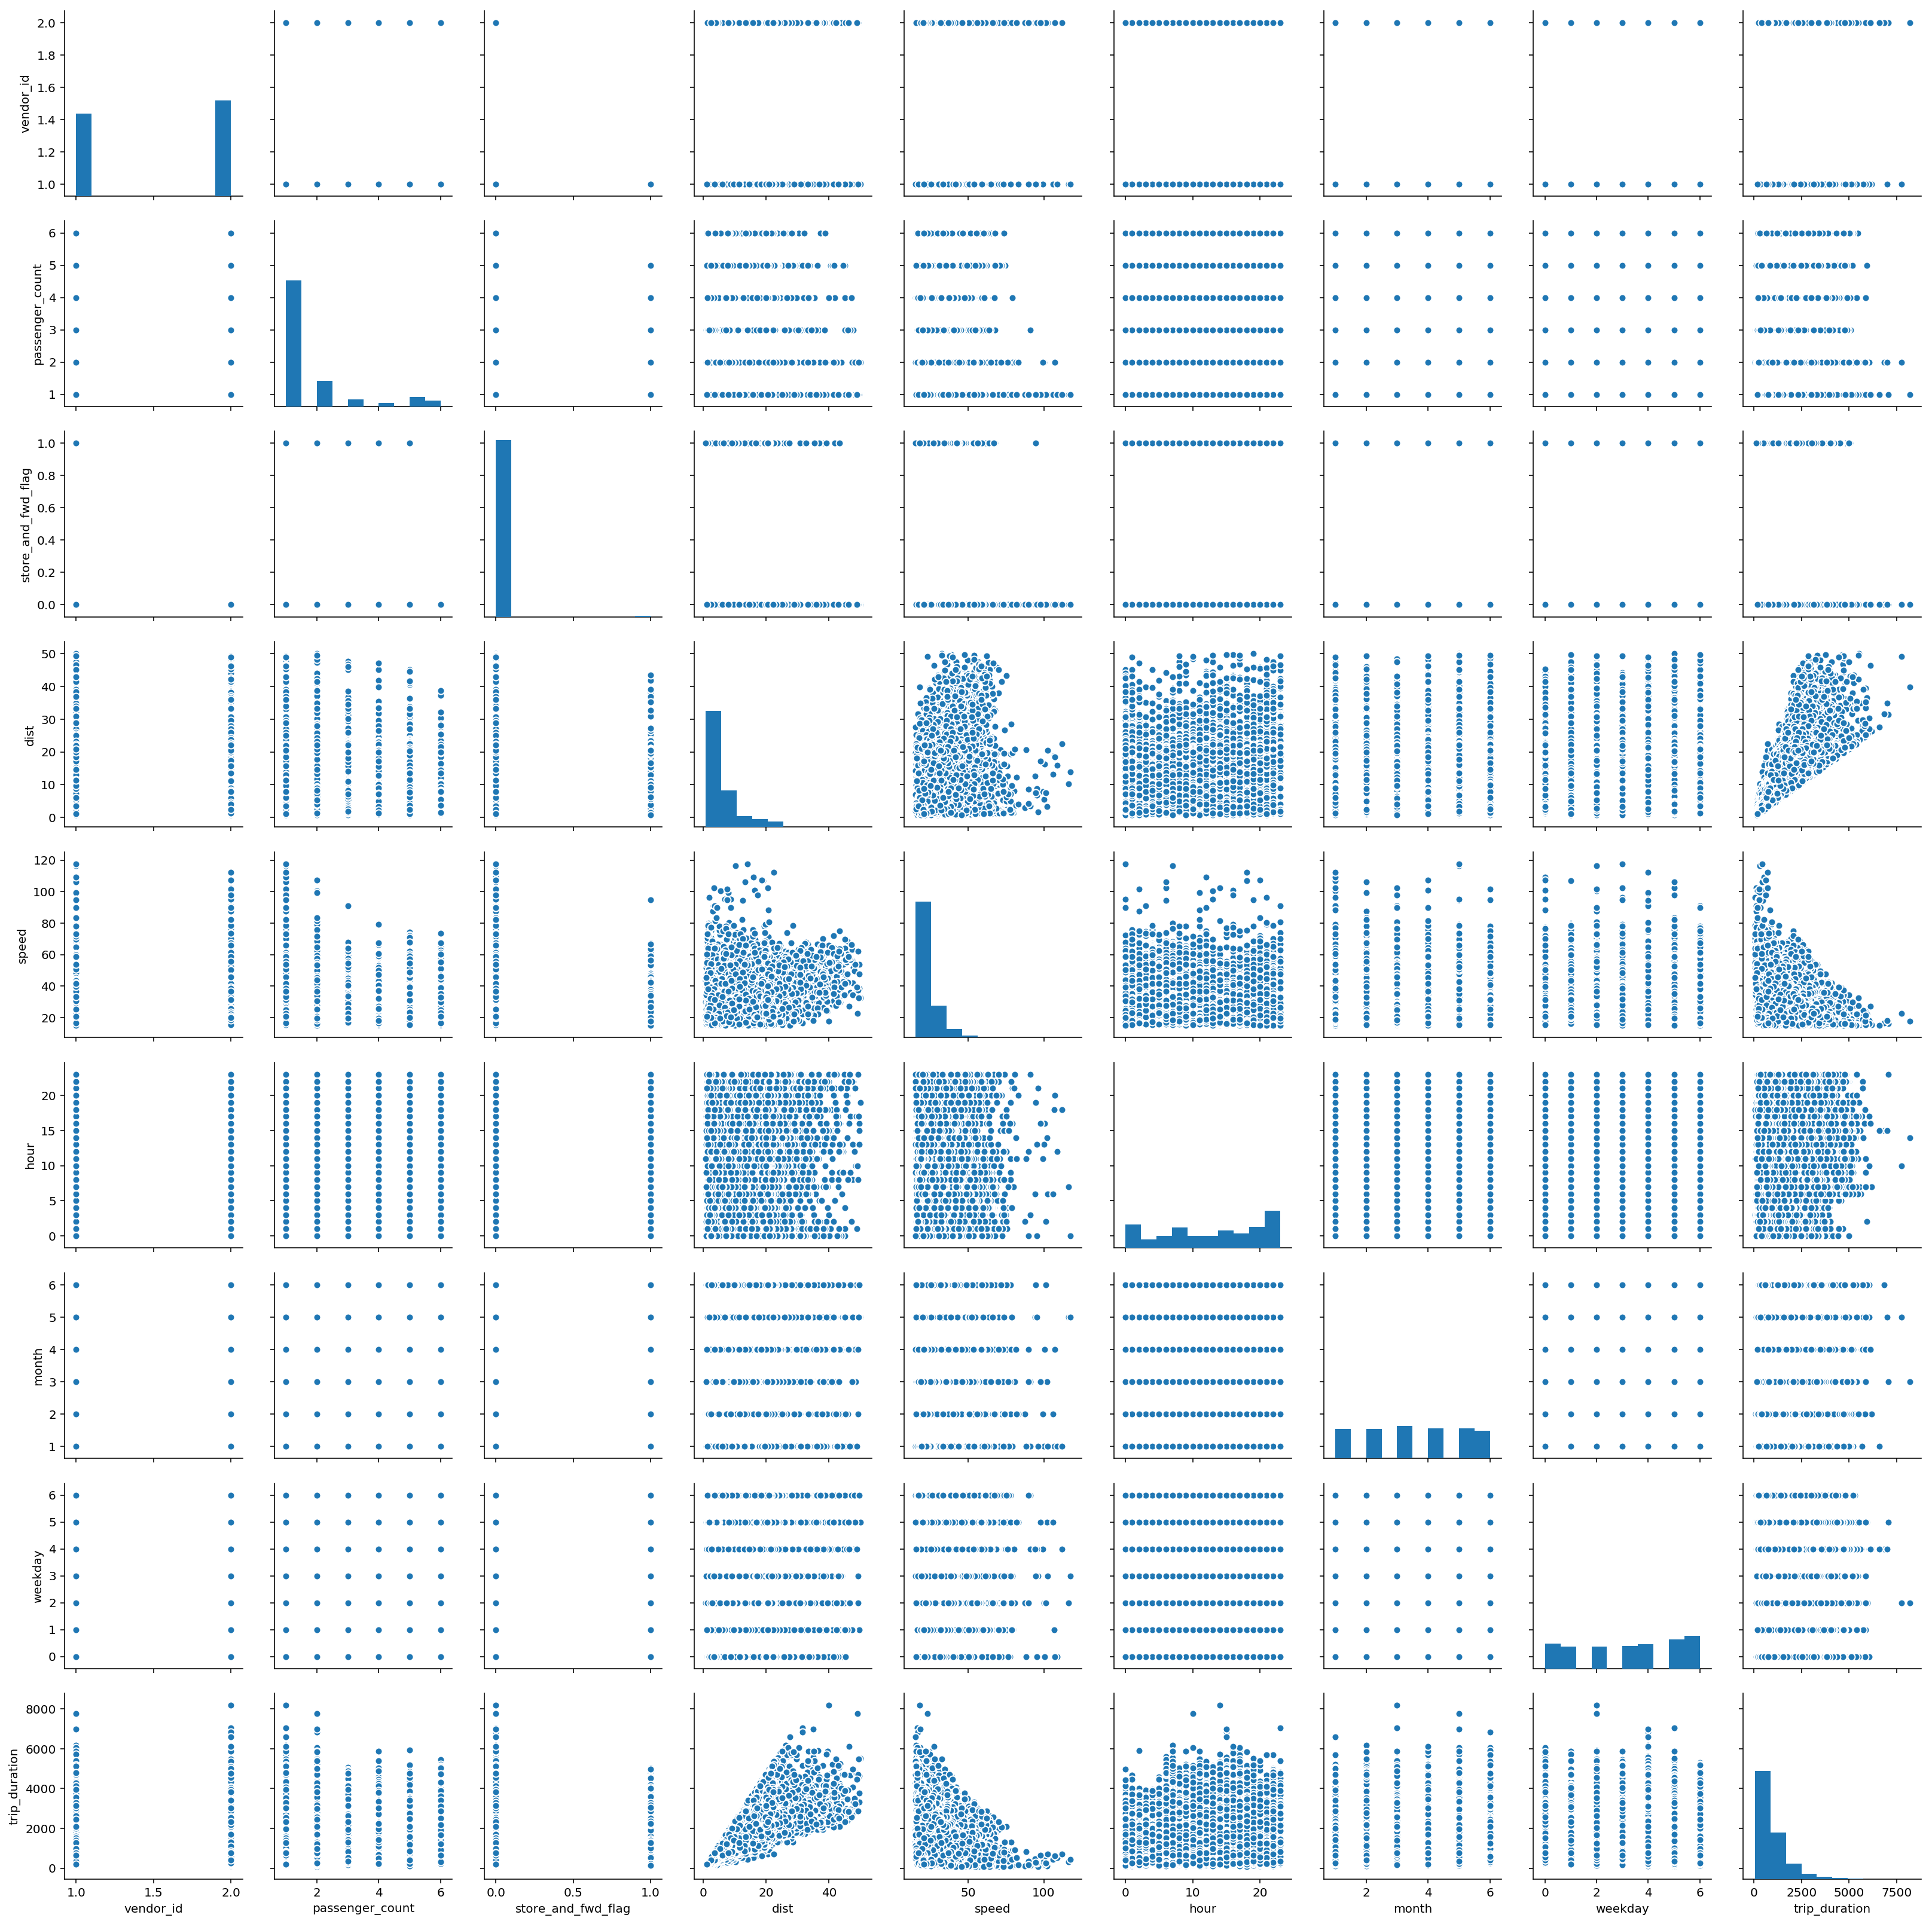

In [101]:
sns.pairplot(taxi_1)
plt.show()

dist와 trip_duration말고는 상관관계가 없어보임

### update (18/02/20)

In [93]:
taxi_1.tail(10)

,vendor_id,passenger_count,store_and_fwd_flag,dist,speed,hour,month,weekday,trip_duration,count
527533,2,2,0,1.28,18.96,17,1,6,244,1
527534,2,1,0,2.56,15.32,10,6,4,601,1
527535,1,3,0,1.87,19.72,23,5,5,342,1
527536,2,2,0,3.97,18.41,11,3,6,777,1
527537,1,2,0,5.26,19.47,13,4,6,972,1
527538,1,1,0,3.54,16.75,18,4,6,760,1
527539,2,5,0,2.32,20.14,0,2,1,414,1
527540,1,1,0,6.05,33.23,7,1,6,655,1
527541,2,1,0,7.82,36.85,6,4,4,764,1
527542,1,1,0,1.13,20.61,14,4,1,198,1


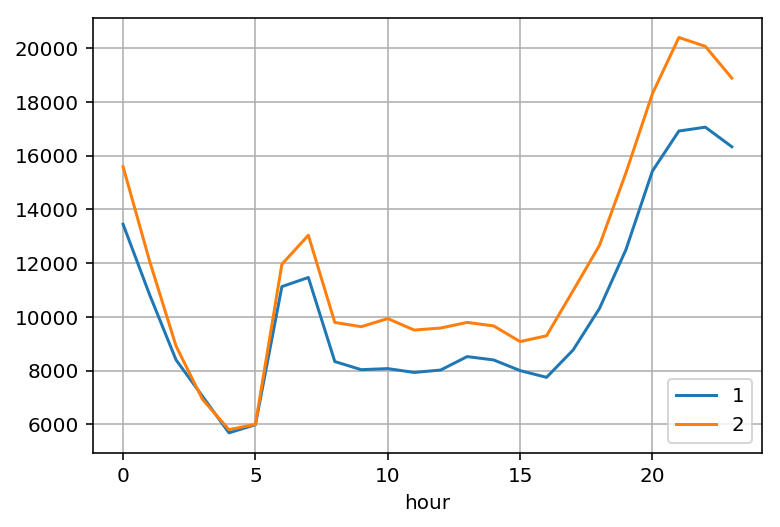

In [94]:
# vendor로 시간별 택시 탑승 횟수 구하기
pivot = taxi_1.pivot_table(values = "count", index = "hour", columns = "vendor_id", aggfunc = "sum")
pivot.plot()
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

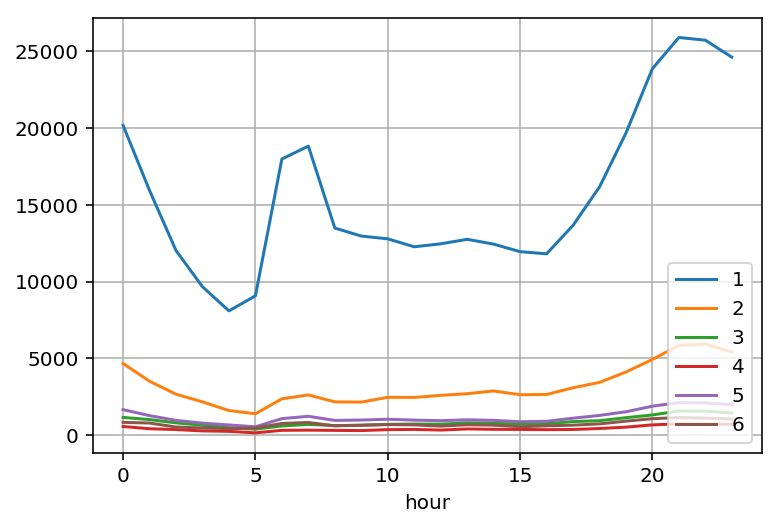

In [95]:
# passenger_count로 시간별 택시 탑승 횟수 구하기
pivot = taxi_1.pivot_table(values = "count", index = "hour", columns = "passenger_count", aggfunc = "sum")
pivot.plot()
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

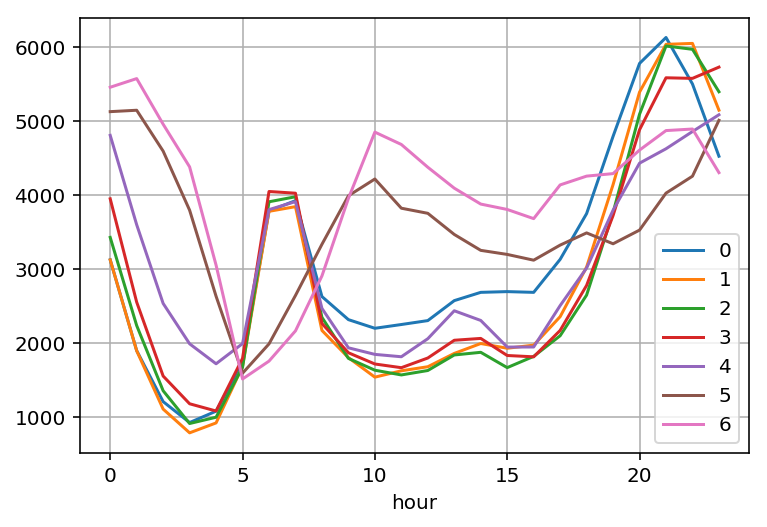

In [96]:
# 일자별로 시간별 택시 탑승 횟수 구하기
pivot = taxi_1.pivot_table(values = "count", index = "hour", columns = "weekday", aggfunc = "sum")
pivot.plot()
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

In [97]:
# 주중, 주말로 나눠 시간별 택시 탑승 횟수 구하기
pivot = taxi_1.pivot_table(values = "count", index = "hour", columns = "weekday", aggfunc = "sum")
pivot_1 = (pivot[0]+pivot[1]+pivot[2]+pivot[3]+pivot[4])/5
pivot_2 = (pivot[5]+pivot[6])/2

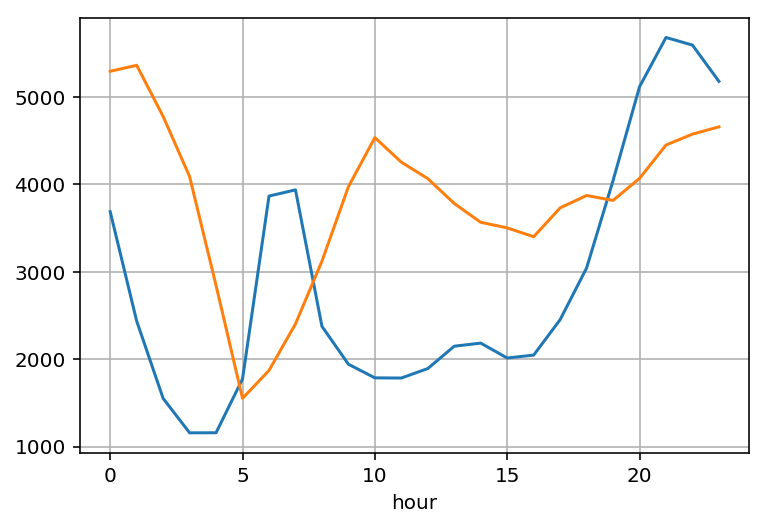

In [98]:
pivot_1.plot() # 주중 (blue)
pivot_2.plot() # 주말 (orange)
plt.grid(True)

plt.show()